In [140]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

import numpy as np
from htmresearch.support.cans.utils import *
from htmresearch.support.cans.basic_dynamics import *
%load_ext autoreload
%autoreload 2

def f_AB(t, a, b):
    return (t - a + np.sqrt(b))**2

def g_AB(x, a, b):
    return np.sqrt(x) + (a - np.sqrt(b))




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


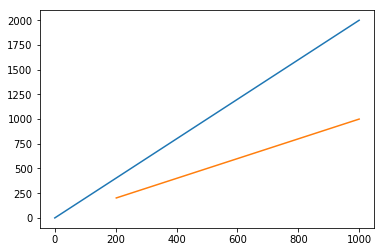

In [141]:

x = np.linspace(0., 1000, num=100)


a = 20
b = np.linspace(a, a + 20., num=100)

c=1.

plt.plot(x, 2*x)
plt.plot(x[20:], x[20:])
plt.show()

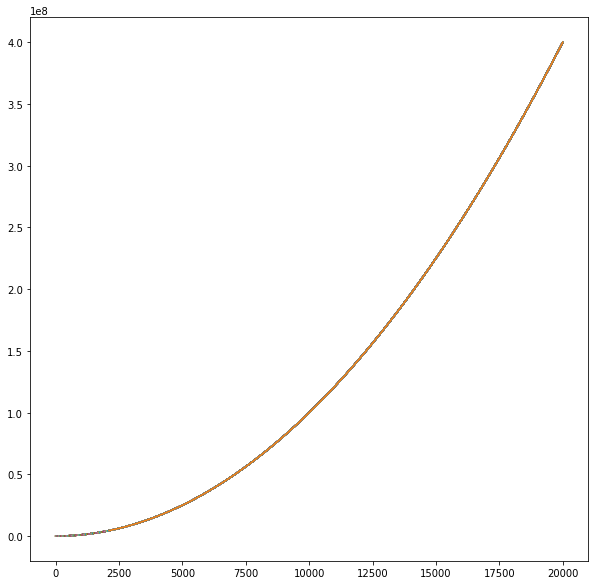

S [ 1.95391903  0.85779506  0.47126971  0.30439181  0.21663478  0.16413854
  0.12986697  0.10605571  0.08872741  0.0756546   0.06550611  0.05744041
  0.05090537  0.04552292  0.04102647  0.03722492  0.03397639  0.03117448
  0.02873788  0.02660292  0.02472012  0.02304938  0.02155871  0.02022227
  0.01901838  0.01792944  0.01694062  0.01603952  0.01521553  0.01445984
  0.01376467  0.01312348  0.01253057  0.01198104  0.01147053  0.01099531
  0.01055201  0.01013773  0.00974984  0.0093861   0.00904443  0.00872298
  0.00842014  0.00813444  0.00786455  0.00760926  0.00736748  0.00713825
  0.00692067  0.00671392  0.00651726  0.00633002  0.00615158  0.00598137
  0.00581887  0.0056636   0.00551511  0.005373    0.00523689  0.00510644
  0.00498131  0.00486121  0.00474586  0.00463499  0.00452839  0.0044258
  0.00432703  0.00423189  0.00414018  0.00405173  0.00396639  0.003884
  0.00380443  0.00372754  0.0036532   0.0035813   0.00351173  0.00344439
  0.00337917  0.00331598  0.00325474  0.00319536  0.

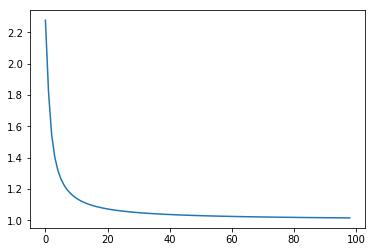

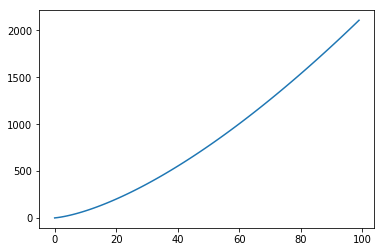

In [143]:
ts = np.linspace(0.,20000.,num=10000000)


D = 10.

t_old = 0.


T = []
X = []

S = []
inds = []
for i in range(100):
    ind = np.argmin( np.absolute(  f_AB(ts, t_old, (i+1)*D) - f_AB(ts, t_old, i*D ) - 2.*D ) )
    inds.append(ind)
    t_new = ts[ind] 
    S.append(t_new - g_AB(i*D,  t_old, (i+1)*D))
    t_old = t_new
    T.append(t_new)


T = np.array(T)
X = np.zeros(len(T))
S = np.array(S)


plt.figure(figsize=(10,10))
plt.plot(ts, f_AB(ts, 0., 0))
plt.plot(ts, f_AB(ts, 0., D))

for i in range(len(T)):
    plt.plot(ts[inds[i]:], f_AB(ts, T[i], f_AB(ts, 0., 0)[inds[i]]  + D)[inds[i]:])

    X[i]  = f_AB(ts, T[i], f_AB(ts, 0., 0)[inds[i]]  + D)[inds[i]]
    S[i] =  g_AB(X[i], 0.,0.) - T[i]

    plt.plot((T[i], T[i] + S[i]), (X[i], X[i]), 'b:')
    
plt.show()
# S = T[1:]/T[:-1]

# # print T
print "S", S
print S[:-1]/S[1:]
# print S[1:]/S[:-1]

plt.plot(S[:-1]/S[1:])
plt.show()

plt.plot([0.]+ T)
